In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

#df = pd.read_csv("all_time_teams.csv")
#encodage = 'latin1'


In [2]:
chemin_du_repertoire = 'C:\\Users\\yvann\\OneDrive\\Documents\\Jedha\\CERTIFICATION BLOC 6'

# Changez le répertoire de travail
os.chdir(chemin_du_repertoire)

df2 = pd.read_csv("current_teams.csv")
print(df2)


                 Franchise       Lg     From       To  Yrs     G     W     L  \
0            Atlanta Hawks      NBA  1949-50  2023-24   75  5910  2915  2995   
1           Boston Celtics  NBA/BAA  1946-47  2023-24   78  6087  3613  2474   
2            Brooklyn Nets  NBA/ABA  1967-68  2023-24   57  4584  2017  2567   
3        Charlotte Hornets      NBA  1988-89  2023-24   34  2685  1166  1519   
4            Chicago Bulls      NBA  1966-67  2023-24   58  4653  2370  2283   
5      Cleveland Cavaliers      NBA  1970-71  2023-24   54  4324  2020  2304   
6         Dallas Mavericks      NBA  1980-81  2023-24   44  3516  1779  1737   
7           Denver Nuggets  NBA/ABA  1967-68  2023-24   57  4586  2346  2240   
8          Detroit Pistons  NBA/BAA  1948-49  2023-24   76  5970  2821  3149   
9    Golden State Warriors  NBA/BAA  1946-47  2023-24   78  6074  2950  3124   
10         Houston Rockets      NBA  1967-68  2023-24   57  4578  2352  2226   
11          Indiana Pacers  NBA/ABA  196

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Franchise    30 non-null     object 
 1   Lg           30 non-null     object 
 2   From         30 non-null     object 
 3   To           30 non-null     object 
 4   Yrs          30 non-null     int64  
 5   G            30 non-null     int64  
 6   W            30 non-null     int64  
 7   L            30 non-null     int64  
 8   W/L%         30 non-null     float64
 9   Plyfs        30 non-null     int64  
 10  Div          30 non-null     float64
 11  Conf         30 non-null     int64  
 12  Champ        30 non-null     int64  
 13  Team Abbr    30 non-null     object 
 14  Unnamed: 14  18 non-null     object 
 15  Unnamed: 15  10 non-null     object 
 16  Unnamed: 16  5 non-null      object 
 17  Unnamed: 17  3 non-null      object 
 18  Unnamed: 18  1 non-null      object 
dtypes: float64

In [4]:
df2.isnull().sum()

Franchise       0
Lg              0
From            0
To              0
Yrs             0
G               0
W               0
L               0
W/L%            0
Plyfs           0
Div             0
Conf            0
Champ           0
Team Abbr       0
Unnamed: 14    12
Unnamed: 15    20
Unnamed: 16    25
Unnamed: 17    27
Unnamed: 18    29
dtype: int64

In [5]:
df2.head()

,Franchise,Lg,From,To,Yrs,G,W,L,W/L%,Plyfs,Div,Conf,Champ,Team Abbr,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,Atlanta Hawks,NBA,1949-50,2023-24,75,5910,2915,2995,0.493,49,12.0,0,1,'ATL,STL,MLH,TRI',NaN,NaN
1,Boston Celtics,NBA/BAA,1946-47,2023-24,78,6087,3613,2474,0.594,60,33.0,10,17,'BOS',NaN,NaN,NaN,NaN,NaN
2,Brooklyn Nets,NBA/ABA,1967-68,2023-24,57,4584,2017,2567,0.440,31,5.0,2,2,'BRK,NJN,NYN,NYA,NJA',NaN
3,Charlotte Hornets,NBA,1988-89,2023-24,34,2685,1166,1519,0.434,10,0.0,0,0,'CHO,CHA,CHH',NaN,NaN,NaN
4,Chicago Bulls,NBA,1966-67,2023-24,58,4653,2370,2283,0.509,37,9.0,6,6,'CHI',NaN,NaN,NaN,NaN,NaN


In [6]:
# Conserver uniquement les colonnes spécifiées
df2 = df2[['Franchise', 'From', 'To', 'Yrs', 'G', 'W', 'L', 'W/L%', 'Plyfs', 'Div', 'Conf', 'Champ']]
df2.head()


,Franchise,From,To,Yrs,G,W,L,W/L%,Plyfs,Div,Conf,Champ
0,Atlanta Hawks,1949-50,2023-24,75,5910,2915,2995,0.493,49,12.0,0,1
1,Boston Celtics,1946-47,2023-24,78,6087,3613,2474,0.594,60,33.0,10,17
2,Brooklyn Nets,1967-68,2023-24,57,4584,2017,2567,0.440,31,5.0,2,2
3,Charlotte Hornets,1988-89,2023-24,34,2685,1166,1519,0.434,10,0.0,0,0
4,Chicago Bulls,1966-67,2023-24,58,4653,2370,2283,0.509,37,9.0,6,6


In [7]:
df2.to_csv('Current teams.csv', index=False)

In [8]:
titresNBA_par_franchise = df2.groupby('Franchise')['Champ'].sum()
titresNBA_par_franchise = titresNBA_par_franchise.sort_values(ascending=False)
print(titresNBA_par_franchise)

Franchise
Boston Celtics            17
Los Angeles Lakers        17
Golden State Warriors      7
Chicago Bulls              6
San Antonio Spurs          5
Miami Heat                 3
Philadelphia 76ers         3
Indiana Pacers             3
Detroit Pistons            3
New York Knicks            2
Houston Rockets            2
Brooklyn Nets              2
Milwaukee Bucks            2
Portland Trail Blazers     1
Sacramento Kings           1
Toronto Raptors            1
Oklahoma City Thunder      1
Atlanta Hawks              1
Denver Nuggets             1
Dallas Mavericks           1
Cleveland Cavaliers        1
Washington Wizards         1
New Orleans Pelicans       0
Minnesota Timberwolves     0
Memphis Grizzlies          0
Orlando Magic              0
Los Angeles Clippers       0
Phoenix Suns               0
Charlotte Hornets          0
Utah Jazz                  0
Name: Champ, dtype: int64


In [9]:
titresCONF_par_franchise = df2.groupby('Franchise')['Conf'].sum()
titresCONF_par_franchise = titresCONF_par_franchise.sort_values(ascending=False)
print(titresCONF_par_franchise)

Franchise
Los Angeles Lakers        19
Boston Celtics            10
Miami Heat                 7
Golden State Warriors      7
San Antonio Spurs          6
Chicago Bulls              6
Philadelphia 76ers         5
Cleveland Cavaliers        5
Detroit Pistons            5
Oklahoma City Thunder      4
New York Knicks            4
Washington Wizards         4
Houston Rockets            4
Portland Trail Blazers     3
Milwaukee Bucks            3
Phoenix Suns               3
Orlando Magic              2
Utah Jazz                  2
Brooklyn Nets              2
Dallas Mavericks           2
Toronto Raptors            1
Denver Nuggets             1
Indiana Pacers             1
Sacramento Kings           0
Los Angeles Clippers       0
Charlotte Hornets          0
New Orleans Pelicans       0
Minnesota Timberwolves     0
Memphis Grizzlies          0
Atlanta Hawks              0
Name: Conf, dtype: int64


<Figure size 1200x800 with 0 Axes>

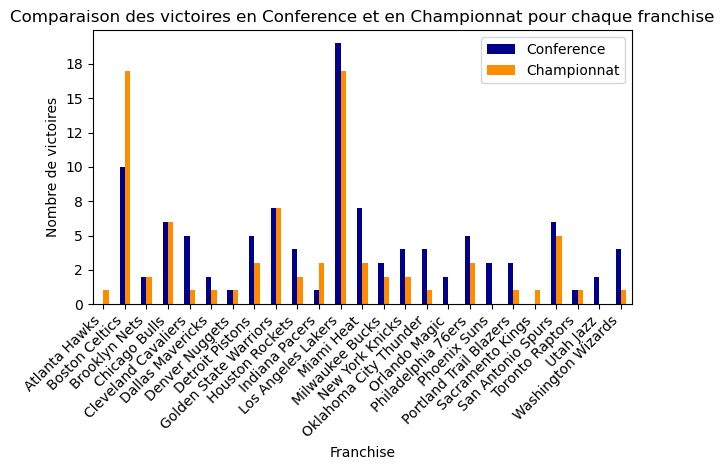

In [10]:
# Filtrer les franchises ayant gagné à la fois la Conférence et le Championnat
#df_filtered = df2[(df2['Conf'] > 0) & (df2['Champ'] > 0)]
df_filtered = df2[(df2['Conf'] > 0) | (df2['Champ'] > 0)]


# Graphique
plt.figure(figsize=(12, 8))
df_filtered.plot(kind='bar', x='Franchise', y=['Conf', 'Champ'], color=['darkblue', 'darkorange'])
plt.title('Comparaison des victoires en Conference et en Championnat pour chaque franchise')
plt.xlabel('Franchise')
plt.ylabel('Nombre de victoires')
plt.xticks(rotation=45, ha='right')
plt.legend(['Conference', 'Championnat'])

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().set_major_formatter('{:.0f}'.format)
plt.tight_layout()
plt.show()

Classement des équipes avec le meilleur ratio de victoire (W/L%) :
    Classement               Franchise   W/L%
1            1          Boston Celtics  0.594
13           2      Los Angeles Lakers  0.591
26           3       San Antonio Spurs  0.583
28           4               Utah Jazz  0.542
23           5            Phoenix Suns  0.536
20           6   Oklahoma City Thunder  0.535
16           7         Milwaukee Bucks  0.528
15           8              Miami Heat  0.527
24           9  Portland Trail Blazers  0.527
22          10      Philadelphia 76ers  0.522
10          11         Houston Rockets  0.514
7           12          Denver Nuggets  0.512
11          13          Indiana Pacers  0.510
4           14           Chicago Bulls  0.509
6           15        Dallas Mavericks  0.506
0           16           Atlanta Hawks  0.493
19          17         New York Knicks  0.487
9           18   Golden State Warriors  0.486
27          19         Toronto Raptors  0.477
8           2

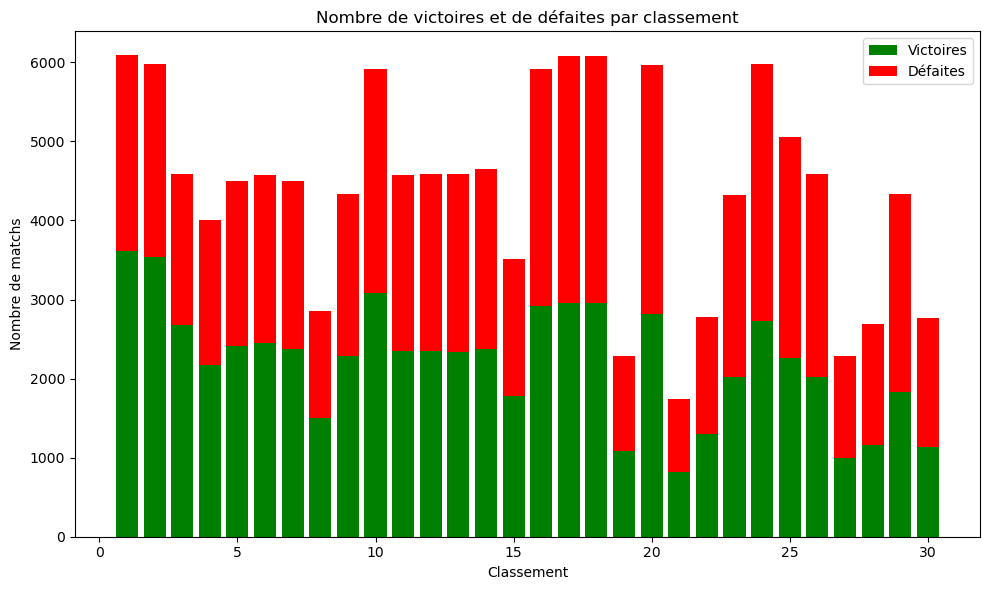

In [11]:
# Trier le DataFrame par le ratio de victoire (W/L%) en ordre décroissant
df2_sorted = df2.sort_values(by='W/L%', ascending=False)

# Créer une nouvelle colonne 
df2_sorted['Classement'] = range(1, len(df2_sorted) + 1)

# Afficher le classement des équipes avec le meilleur ratio de victoire
print("Classement des équipes avec le meilleur ratio de victoire (W/L%) :")
print(df2_sorted[['Classement', 'Franchise', 'W/L%']])

# Tableau 
plt.figure(figsize=(10, 6))
plt.bar(df2_sorted['Classement'], df2_sorted['W'], color='green', label='Victoires')
plt.bar(df2_sorted['Classement'], df2_sorted['L'], color='red', label='Défaites', bottom=df2_sorted['W'])
plt.xlabel('Classement')
plt.ylabel('Nombre de matchs')
plt.title('Nombre de victoires et de défaites par classement')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
# Supposons que vous avez un DataFrame df avec une colonne 'col' contenant des valeurs de type "YYYY-YY"
# Vous pouvez diviser la chaîne en deux parties en utilisant le caractère '-' comme séparateur, puis conserver uniquement la première partie
df2['From'] = df2['From'].str.split('-').str[0]

# Ensuite, vous pouvez convertir les valeurs en type de données lettre
df2['From'] = df2['From'].astype(str)
